## TP 2

$$\left\{\begin{array}{l}
\left.\frac{\partial u}{\partial t}(x, t)+a \frac{\partial u}{\partial x}(x, t)=0, \quad \forall(x, t) \in\right] 0, L[\times] 0, T[ \\
u(0, t)=u(L, t)=0, \quad \forall t \in] 0, T[ \\
\left.u(x, 0)=u_{0}(x), \quad \forall x \in\right] 0, L[
\end{array}\right.$$

In [197]:
%%file advection.m
function advection(scheme,Nt,Nx)
% Script calculant une approximation de la solution du probl�me
% d'advection lin�aire 1D.
%
%  Inputs
%  ------
%
% scheme : sch�ma num�rique � utiliser.
%
% Nt : nombre de pas de temps.
%
% Nx: nombre de pas d'espace.
%
% Exemple: advection('LaxWendroff',200,500);


% Cadre experimental
a=1.; % vitesse
L=3; % longueur du domaine spatial.
T=1; % longueur de la fen�tre temporelle.
ic=1; % condition initiale : 0 -> porte, sinon densit� gaussienne

% D�finition de la grille
dx=L/(Nx+1);
dt=T/(Nt+1);
xx=0:Nx+1;
xx=xx';
%dt=dx/a;

% Nombre de Courant
lambda=a*dt/dx

% Condition initiale
u0=zeros(Nx+2,1);
u0=reference(ic,lambda,Nx,dx,0);
rmse=zeros(Nt+1,1);

% Boucle temporelle
uh=u0;
% u(x, t) = ux[t]

for k=1:Nt+1
    
    if scheme == 1 %Explicite
      % int�rieur du domain
      uh(2:end-1) = (1-lambda)*uh(2:end-1) + lambda*uh(1:end-2)
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    elseif scheme == 2 %Implicite
      % int�rieur du domain
      A = spdiags(ones(Nx,1)*[-lambda/2, 1, lambda/2], [-1, 0, 1], Nx, Nx);
      uh(2:end-1) = A\uh(2:end-1);
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    elseif scheme == 3 %Implicite
      % int�rieur du domain
      uh(2:end-1) = uh(2:end-1) - (lambda/2)*(uh(3:end) - uh(1:end-2)) + (lambda^2/2)*(uh(3:end) - 2.*uh(2:end-1) + uh(1:end-2));
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    end
  %Erreur RMS
  uref=reference(ic,lambda,Nx,dx,k);
  rmse(k)=norm(uh-uref,2)/norm(uref,2);

  % Affichage de la solution
  figure(1)
  plot(dx*xx,uh,'b-',dx*xx,uref,'r-');
  axis([0 L -1 max(abs(u0))+1]);
  legend('Solution numerique','Solution de reference');
  xlabel('Domaine spatial')
  ylabel('u')
  pause(0.1);
end

  % Affichage de l'erreur RMS
  figure(2)
  plot(rmse);
  legend('Erreur RMS')

end


Created file '/home/jblancho/Le-TP-de-Keunotor/edp/tp/tp2/advection.m'.


## scheme = 1

$$ u_{x}^{1} = (1-\lambda)u_{x}^{0} + \lambda u_{x-1}^{0} $$
$$u_{0}^{1} = 0 $$
$$u_{L}^{1} = 0$$

## scheme = 2

## scheme = 3

In [189]:
scheme = 3;
Nt = 10;
Nx = 30;

In [190]:
% Cadre experimental
a=1.; % vitesse
L=3; % longueur du domaine spatial.
T=1; % longueur de la fen�tre temporelle.
ic=1; % condition initiale : 0 -> porte, sinon densit� gaussienne

In [191]:
% D�finition de la grille
dx=L/(Nx+1);
dt=T/(Nt+1);
xx=0:Nx+1;
xx=xx';
%dt=dx/a;

In [192]:
% Nombre de Courant
lambda=a*dt/dx


lambda =

    0.9394



In [193]:
% Condition initiale
u0=zeros(Nx+2,1);
u0=reference(ic,lambda,Nx,dx,0);
rmse=zeros(Nt+1,1);

In [194]:
% Boucle temporelle
uh=u0;
% u(x, t) = ux[t]
% ux[t+1] = (1-lambda)*ux[t]+lambda*ux[t-1]
% Cond: ux[0] = reference(ic,lambda,Nx,dx,k)
size(uh(1:end));
Nx+2;

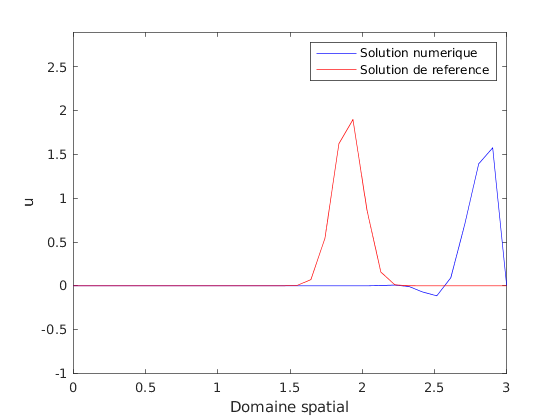

In [196]:
for k=1:Nt+1
    
    if scheme == 1 %Explicite
      % int�rieur du domain
      uh(2:end-1) = (1-lambda)*uh(2:end-1) + lambda*uh(1:end-2)
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    elseif scheme == 2 %Implicite
      % int�rieur du domain
      A = spdiags(ones(Nx,1)*[-lambda/2, 1, lambda/2], [-1, 0, 1], Nx, Nx);
      uh(2:end-1) = A\uh(2:end-1);
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    elseif scheme == 3 %Implicite
      % int�rieur du domain
      uh(2:end-1) = uh(2:end-1) - (lambda/2)*(uh(3:end) - uh(1:end-2)) + (lambda^2/2)*(uh(3:end) - 2.*uh(2:end-1) + uh(1:end-2));
      % Conditions aux limites
      uh(1) = 0; %u(x=0, t=k) = 0
      uh(end) = 0; %u(x=L, t=k) = 0
    end
  %Erreur RMS
  uref=reference(ic,lambda,Nx,dx,k);
  rmse(k)=norm(uh-uref,2)/norm(uref,2);

  % Affichage de la solution
  figure(1)
  plot(dx*xx,uh,'b-',dx*xx,uref,'r-');
  axis([0 L -1 max(abs(u0))+1]);
  legend('Solution numerique','Solution de reference');
  xlabel('Domaine spatial')
  ylabel('u')
  pause(0.1);
end